# Should your fund invest in Bitcoin?

## 📖 Background
You work as an analyst at an investment fund in New York. Your CFO wants to explore if it is a good idea to invest some of the fund's assets in Bitcoin. You have to prepare a report on this asset and how it compares to the stock market in general.

# Should your fund invest in Bitcoin?

## 📖 Background
You work as an analyst at an investment fund in New York. Your CFO wants to explore if it is a good idea to invest some of the fund's assets in Bitcoin. You have to prepare a report on this asset and how it compares to the stock market in general.

## 💾 The data
You have access to three files:

#### Bitcoin daily data in US dollars
- "date" - date from September 17, 2014 to November 17, 2021
- "open" - the price at the beginning of the trading day
- "high" - the highest price reached that day
- "low" - the lowest price reached that day
- "close" - the price at the closing of the trading day
- "volume" - how many Bitcoin were traded that day

#### S&P 500 daily data
- "date" - date from September 17, 2014 to November 17, 2021
- "open" - the index level at the beginning of the trading day
- "high" - the highest level reached that day
- "low" - the lowest level reached that day
- "close" - the level at the closing of the trading day
- "volume" - how many shares in the companies that make up the index were traded that day

#### inflation and gold as monthly data
- "date" - date from September, 2014 to November, 2021
- "gold_usd" - price in usd of gold for that month
- "cpi_us" - the inflation index for the US for that month (cpi = consumer price index)

_CPI data from the [U.S. Bureau of Labor Statistics](https://www.bls.gov/cpi/). Publicly available information_.

In [5]:
!pip install -qU yfinance
print("installed")

installed


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sktime.utils.plotting import plot_series,plot_correlations
import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
np.random.seed(42)

* we will download the gold prices to every day too:

In [7]:
start = "2014-09-17"
end = '2021-11-17'
gold = yf.download('GOLD',start,end)
gold.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-16,16.459999,16.719999,16.280001,16.57,14.932928,9668300
2014-09-17,16.490000,16.639999,16.180000,16.25,14.644541,9664900
2014-09-18,16.270000,16.320000,15.970000,16.00,14.419243,10900800
2014-09-19,15.910000,15.970000,15.550000,15.65,14.103819,17804700
2014-09-22,15.570000,15.590000,15.310000,15.41,13.887533,13348700


In [8]:
bitcoin = pd.read_csv('./data/bitcoin-usd.csv', parse_dates=['date'])
bitcoin.head()

,date,open,high,low,close,volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100.0


In [9]:
sp500 = pd.read_csv('./data/sp500.csv', parse_dates=['date'])
sp500.head()

,date,open,high,low,close,volume
0,2014-09-17,1999.300049,2010.739990,1993.290039,2001.569946,3209420000
1,2014-09-18,2003.069946,2012.339966,2003.069946,2011.359985,3235340000
2,2014-09-19,2012.739990,2019.260010,2006.589966,2010.400024,4880220000
3,2014-09-22,2009.079956,2009.079956,1991.010010,1994.290039,3349670000
4,2014-09-23,1992.780029,1995.410034,1982.770020,1982.770020,3279350000


In [10]:
monthly_data = pd.read_csv('./data/monthly_data.csv', parse_dates=['date'])
monthly_data.head()

,date,gold_usd,cpi_us
0,2014-09-01,1241.330,237.852
1,2014-10-01,1223.565,238.031
2,2014-11-01,1176.413,237.433
3,2014-12-01,1200.440,236.151
4,2015-01-01,1249.333,234.812


## 💪 Competition challenge
Create a report that covers the following:

1. How does the performance of Bitcoin compare to the S&P 500 and the price of gold?
2. Analyze Bitcoin's returns and volatility profile. Do you believe it could help improve the performance of a portfolio? Do you believe Bitcoin could be used as a hedge versus inflation?
3. The CFO is looking to lower volatility in the fund. Explore building a portfolio using some or all of these assets. Make a recommendation that minimizes overall risk.

## EDA

* we dont need all these columns. we know that the volumes are big in all the 3, and we will take only the "close" column.

In [11]:
gold = gold.loc[:,['Close']]
gold.index.rename('date',inplace=True)
gold.columns = ['close']

In [12]:
bitcoin = bitcoin.loc[:,['date','close']].set_index('date')

In [13]:
sp500 = sp500.loc[:,['date','close']].set_index('date')

In [14]:
# we will treat later "monthly data" dataset.

dfs = {'gold':gold,
       'bitcoin':bitcoin,
       'sp500':sp500}

In [15]:
for df in dfs:
    display(df.upper())
    display(dfs[df].head())
    dfs[df].info()
    print('')
    display(dfs[df].describe(datetime_is_numeric=True).loc[['min','max','mean'],])
    display('**********************')

'GOLD'

,close
date,
2014-09-16,16.57
2014-09-17,16.25
2014-09-18,16.00
2014-09-19,15.65
2014-09-22,15.41


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1807 entries, 2014-09-16 to 2021-11-16
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   1807 non-null   float64
dtypes: float64(1)
memory usage: 28.2 KB



,close
min,5.940000
max,30.459999
mean,16.374521


'**********************'

'BITCOIN'

,close
date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2619 entries, 2014-09-17 to 2021-11-17
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   2615 non-null   float64
dtypes: float64(1)
memory usage: 40.9 KB



,close
min,178.102997
max,67566.828125
mean,10073.814423


'**********************'

'SP500'

,close
date,
2014-09-17,2001.569946
2014-09-18,2011.359985
2014-09-19,2010.400024
2014-09-22,1994.290039
2014-09-23,1982.770020


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1805 entries, 2014-09-17 to 2021-11-15
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   1805 non-null   float64
dtypes: float64(1)
memory usage: 28.2 KB



,close
min,1829.079956
max,4701.700195
mean,2756.455533


'**********************'

* we see 4 null values in bitcoin dataset, lets check it:

In [16]:
bitcoin[bitcoin["close"].isna()]

,close
date,
2020-04-17,NaN
2020-10-09,NaN
2020-10-12,NaN
2020-10-13,NaN


* we will fill them with ffill method: propagate last valid observation forward to next

In [17]:
bitcoin = bitcoin.fillna(method='ffill')

In [18]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2619 entries, 2014-09-17 to 2021-11-17
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   2619 non-null   float64
dtypes: float64(1)
memory usage: 40.9 KB


### lets check monthly data dataset too:

In [19]:
monthly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      87 non-null     datetime64[ns]
 1   gold_usd  87 non-null     float64       
 2   cpi_us    87 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.2 KB


In [20]:
monthly_data.describe(datetime_is_numeric=True).loc[['min','max','mean'],]

,date,gold_usd,cpi_us
min,2014-09-01 00:00:00,1068.317000,233.707000
max,2021-11-01 00:00:00,2041.700000,276.589000
mean,2018-04-01 12:08:16.551724032,1403.186678,249.790759


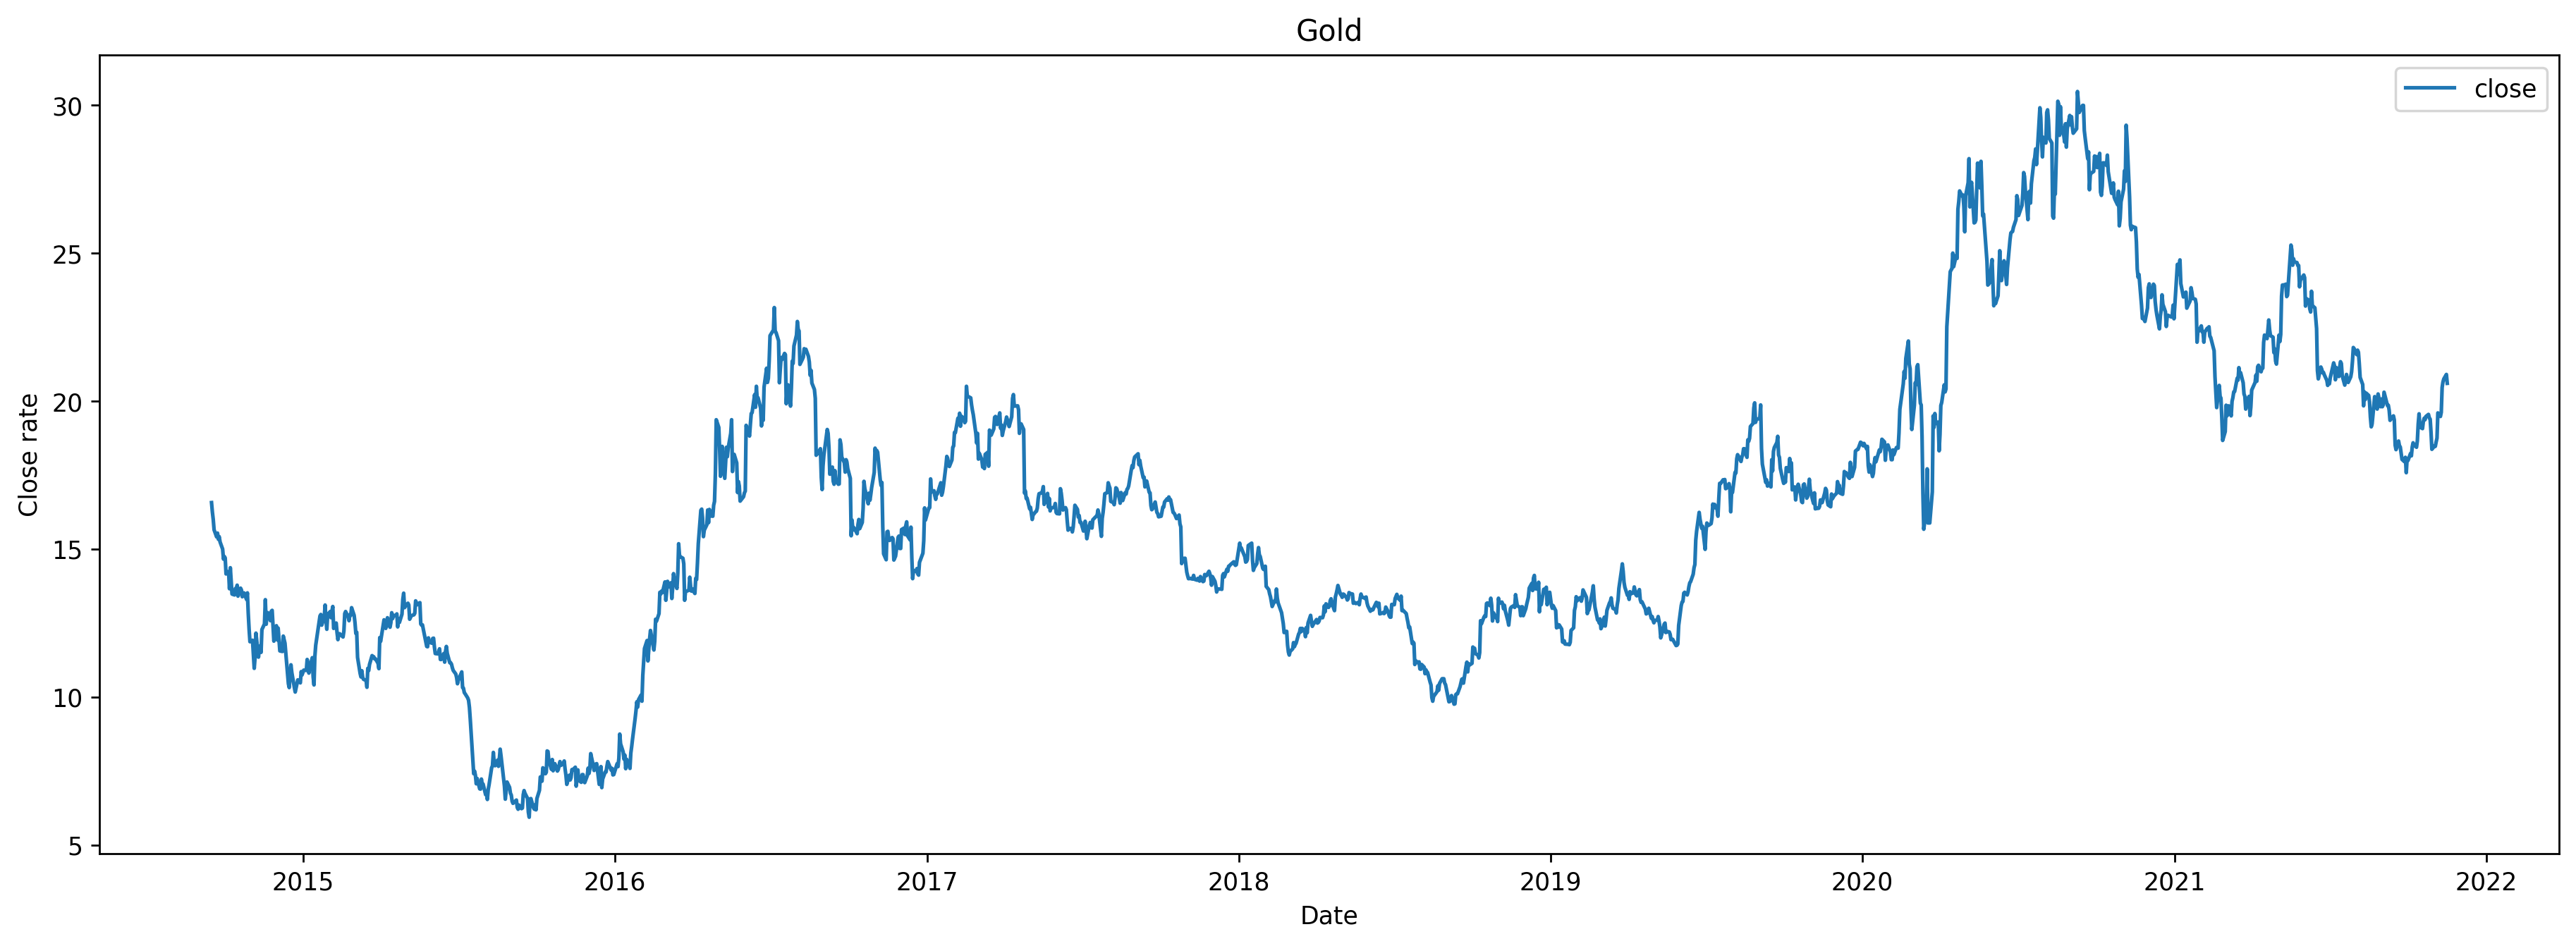

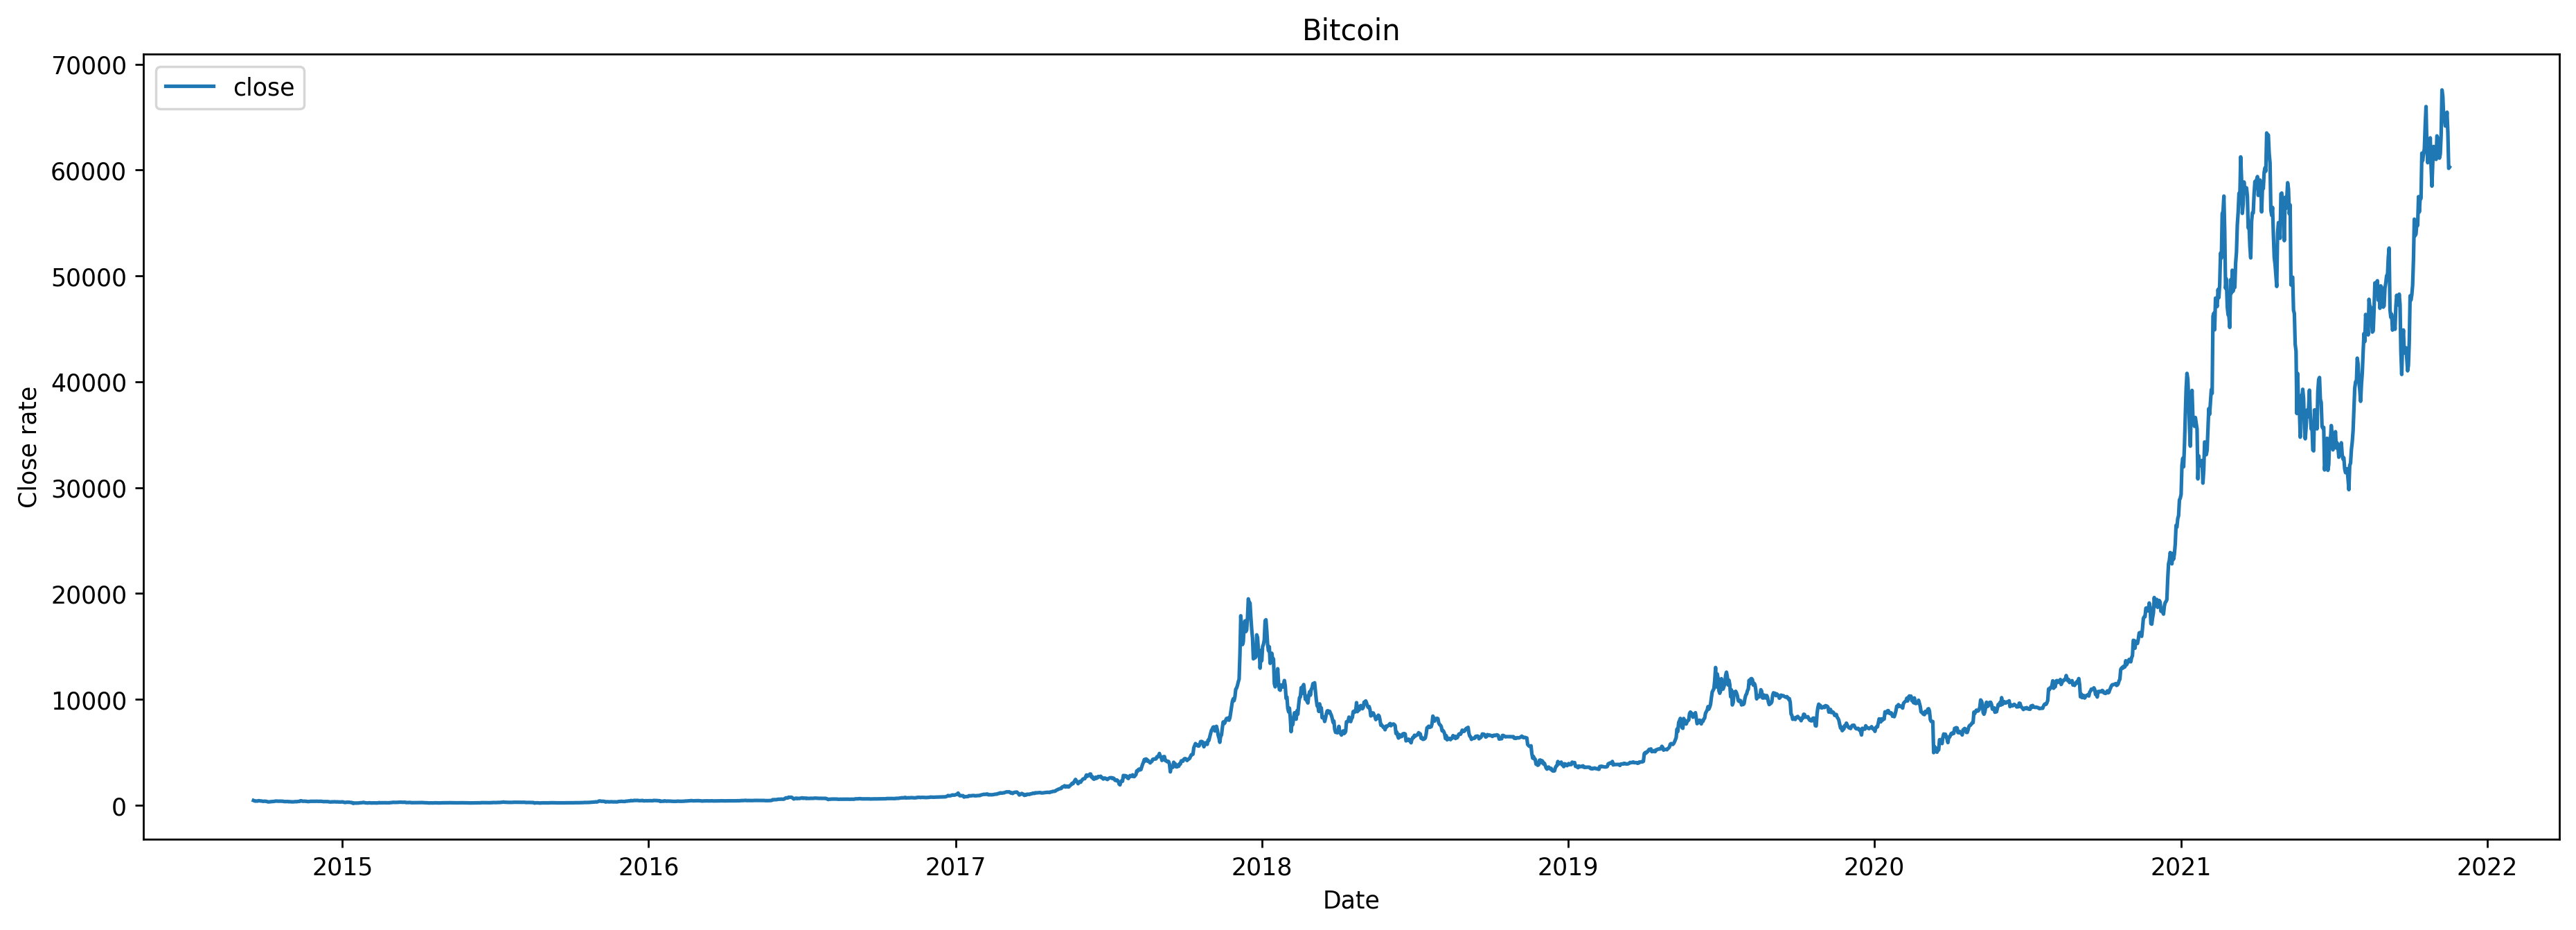

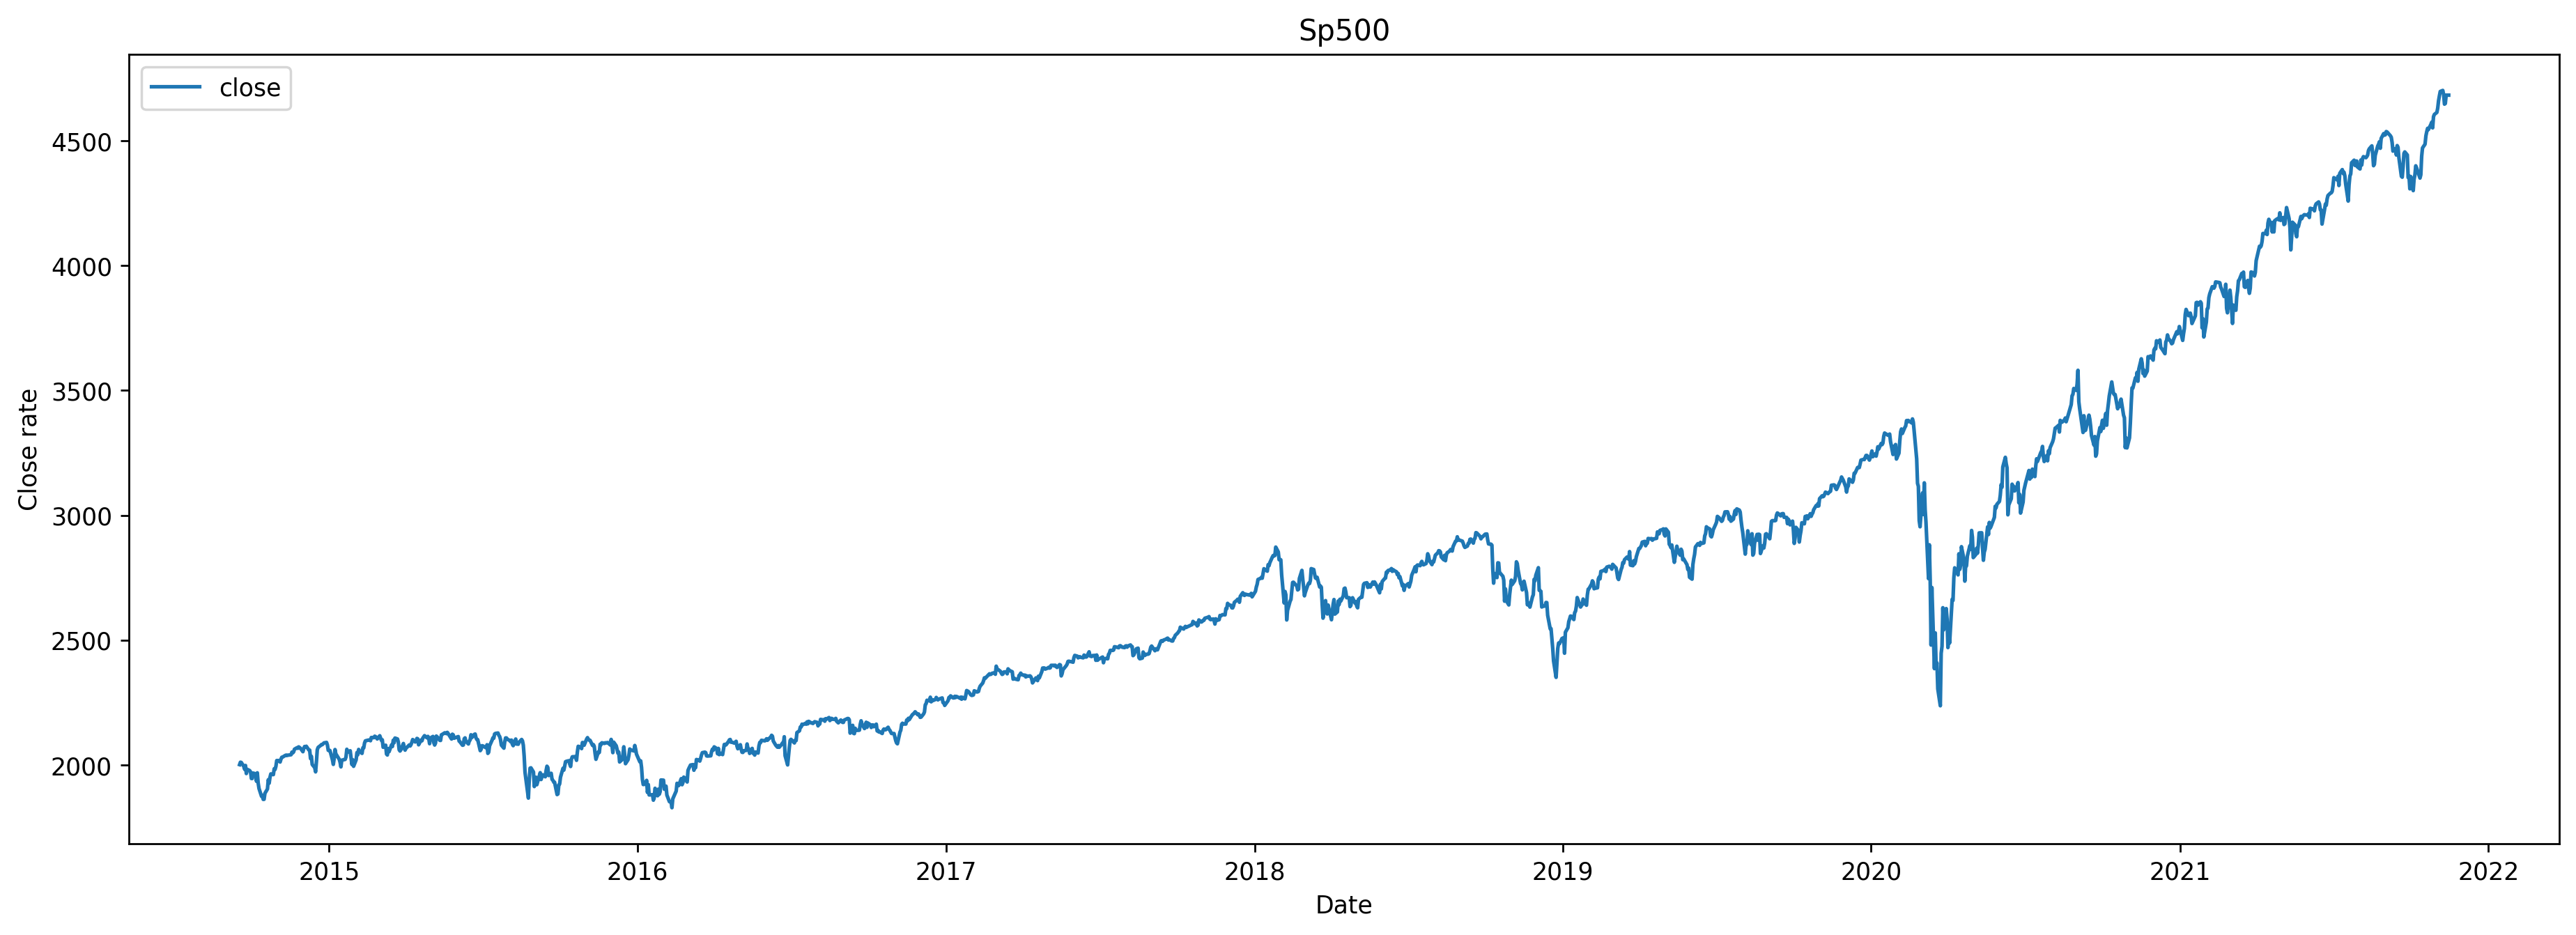

In [21]:
for df in dfs:
    fig, axes = plt.subplots(1,1,figsize=(18,6),dpi = 250)
    sns.lineplot(data = dfs[df] ,ax = axes).set(title=f'{df.capitalize()}', xlabel='Date', ylabel='Close rate');

* we dont se here stationary data, no constant mean, no constant standard deviation, and no seasonality.
* we could see a very big differences in the ranges for the same priod of time (2015 - 2022) 
        * the gold close rate is between 2- 30
        * the bitcoin close rate is between 0-70K
        * the sp500 close rate is between 1K- 4.5K
* because of the differences in the ranges we plotted all the lines in different plots. but from now on to compare them we will unite the dataset and work on it.

In [22]:
unite = sp500.join(gold, how='inner', lsuffix='_sp500', rsuffix='_gold',).join(bitcoin, how='inner')
unite.rename(columns={'close':'close_bitcoin'},inplace=True)

In [23]:
unite

,close_sp500,close_gold,close_bitcoin
date,,,
2014-09-17,2001.569946,16.250000,457.334015
2014-09-18,2011.359985,16.000000,424.440002
2014-09-19,2010.400024,15.650000,394.795990
2014-09-22,1994.290039,15.410000,402.152008
2014-09-23,1982.770020,15.540000,435.790985
...,...,...,...
2021-11-09,4685.250000,19.620001,66971.828125
2021-11-10,4646.709961,20.459999,64995.230469
2021-11-11,4649.270020,20.650000,64949.960938


In [24]:
unite.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1805 entries, 2014-09-17 to 2021-11-15
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   close_sp500    1805 non-null   float64
 1   close_gold     1805 non-null   float64
 2   close_bitcoin  1805 non-null   float64
dtypes: float64(3)
memory usage: 56.4 KB


* to compare the shares, first we will calculate the percentage change in value from one day to the next. 

In [25]:
unite_pct = unite.pct_change()

In [26]:
unite_pct.columns = ['sp500','gold','bitcoin']

In [27]:
unite_pct.head(10)

,sp500,gold,bitcoin
date,,,
2014-09-17,NaN,NaN,NaN
2014-09-18,0.004891,-0.015385,-0.071926
2014-09-19,-0.000477,-0.021875,-0.069843
2014-09-22,-0.008013,-0.015335,0.018632
2014-09-23,-0.005777,0.008436,0.083647
2014-09-24,0.007832,-0.013514,-0.028881
2014-09-25,-0.016169,0.005871,-0.027483
2014-09-26,0.008576,-0.011673,-0.017370
2014-09-29,-0.002547,-0.015748,-0.071603


In [28]:
unite_pct = unite_pct.dropna()

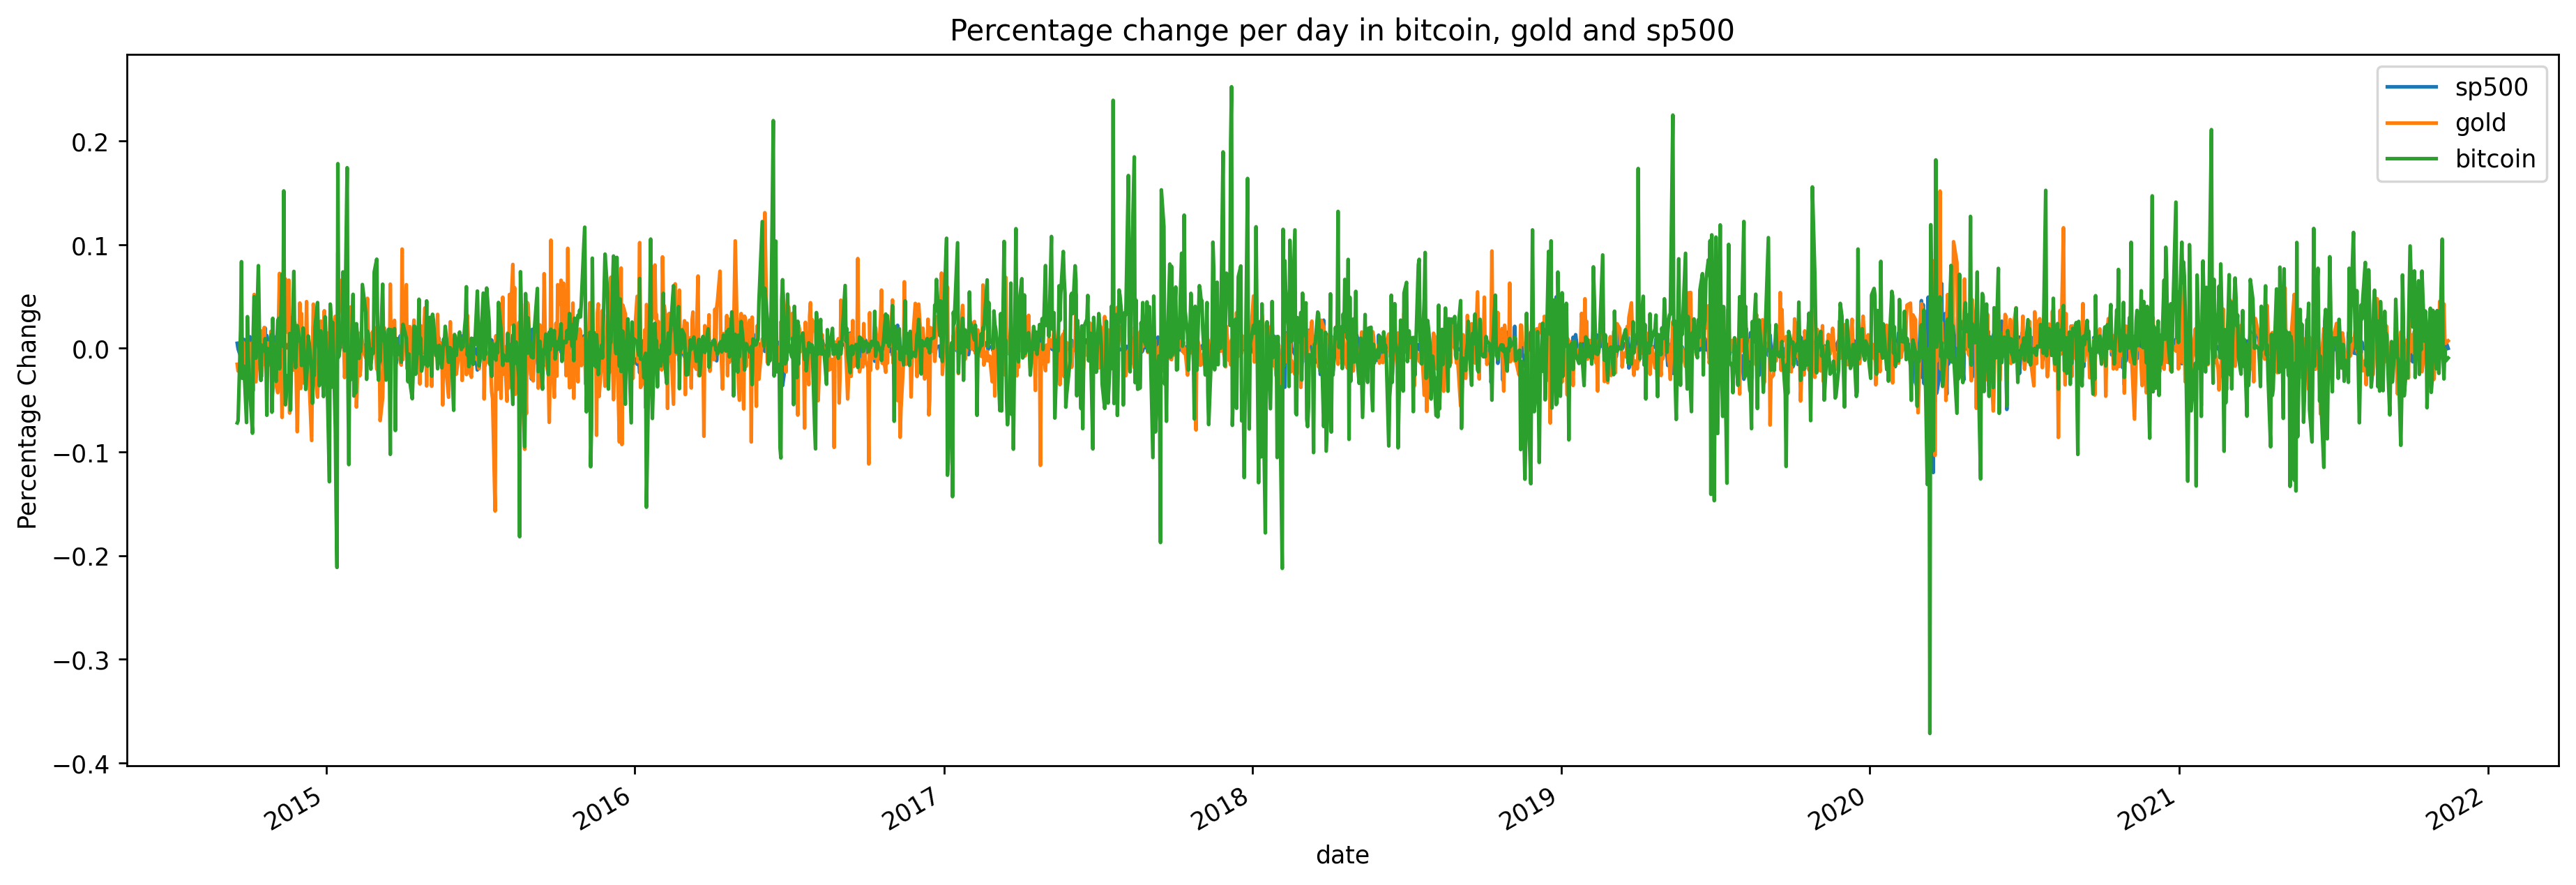

In [29]:
fig, axes = plt.subplots(1,1,figsize=(18,6),dpi = 250)
unite_pct.plot(ax = axes);
plt.title("Percentage change per day in bitcoin, gold and sp500")
plt.ylabel("Percentage Change");

In [30]:
unite_pct.describe(datetime_is_numeric=True).loc[['min','max','mean'],]

,sp500,gold,bitcoin
min,-0.119841,-0.156997,-0.371695
max,0.093828,0.151802,0.252472
mean,0.000535,0.000496,0.003816


* we could see here too that the bitcoin ranges are much bigger! 
* ranges: sum of min max absolute values - 0.2 to sp500, 0.3 to gold, 0.63 to bitcoin.

* now we will calculate the sharpe ratio for every one from the 3 above. 
* the way to calculate it is:
    * Subtract the risk-free rate from the return of the portfolio. The risk-free rate could be a U.S. Treasury rate or yield, such as the one-year or two-year Treasury yield.
    * Divide the result by the standard deviation of the portfolio's excess return.
    * U.S. Treasury rate for 5 years is only 1.26% , the daily mean percentage change is very low, so we will refer it as 0.

In [31]:
m = unite_pct.mean()
m

sp500      0.000535
gold       0.000496
bitcoin    0.003816
dtype: float64

In [32]:
s = unite_pct.std()
s

sp500      0.011239
gold       0.026714
bitcoin    0.046281
dtype: float64

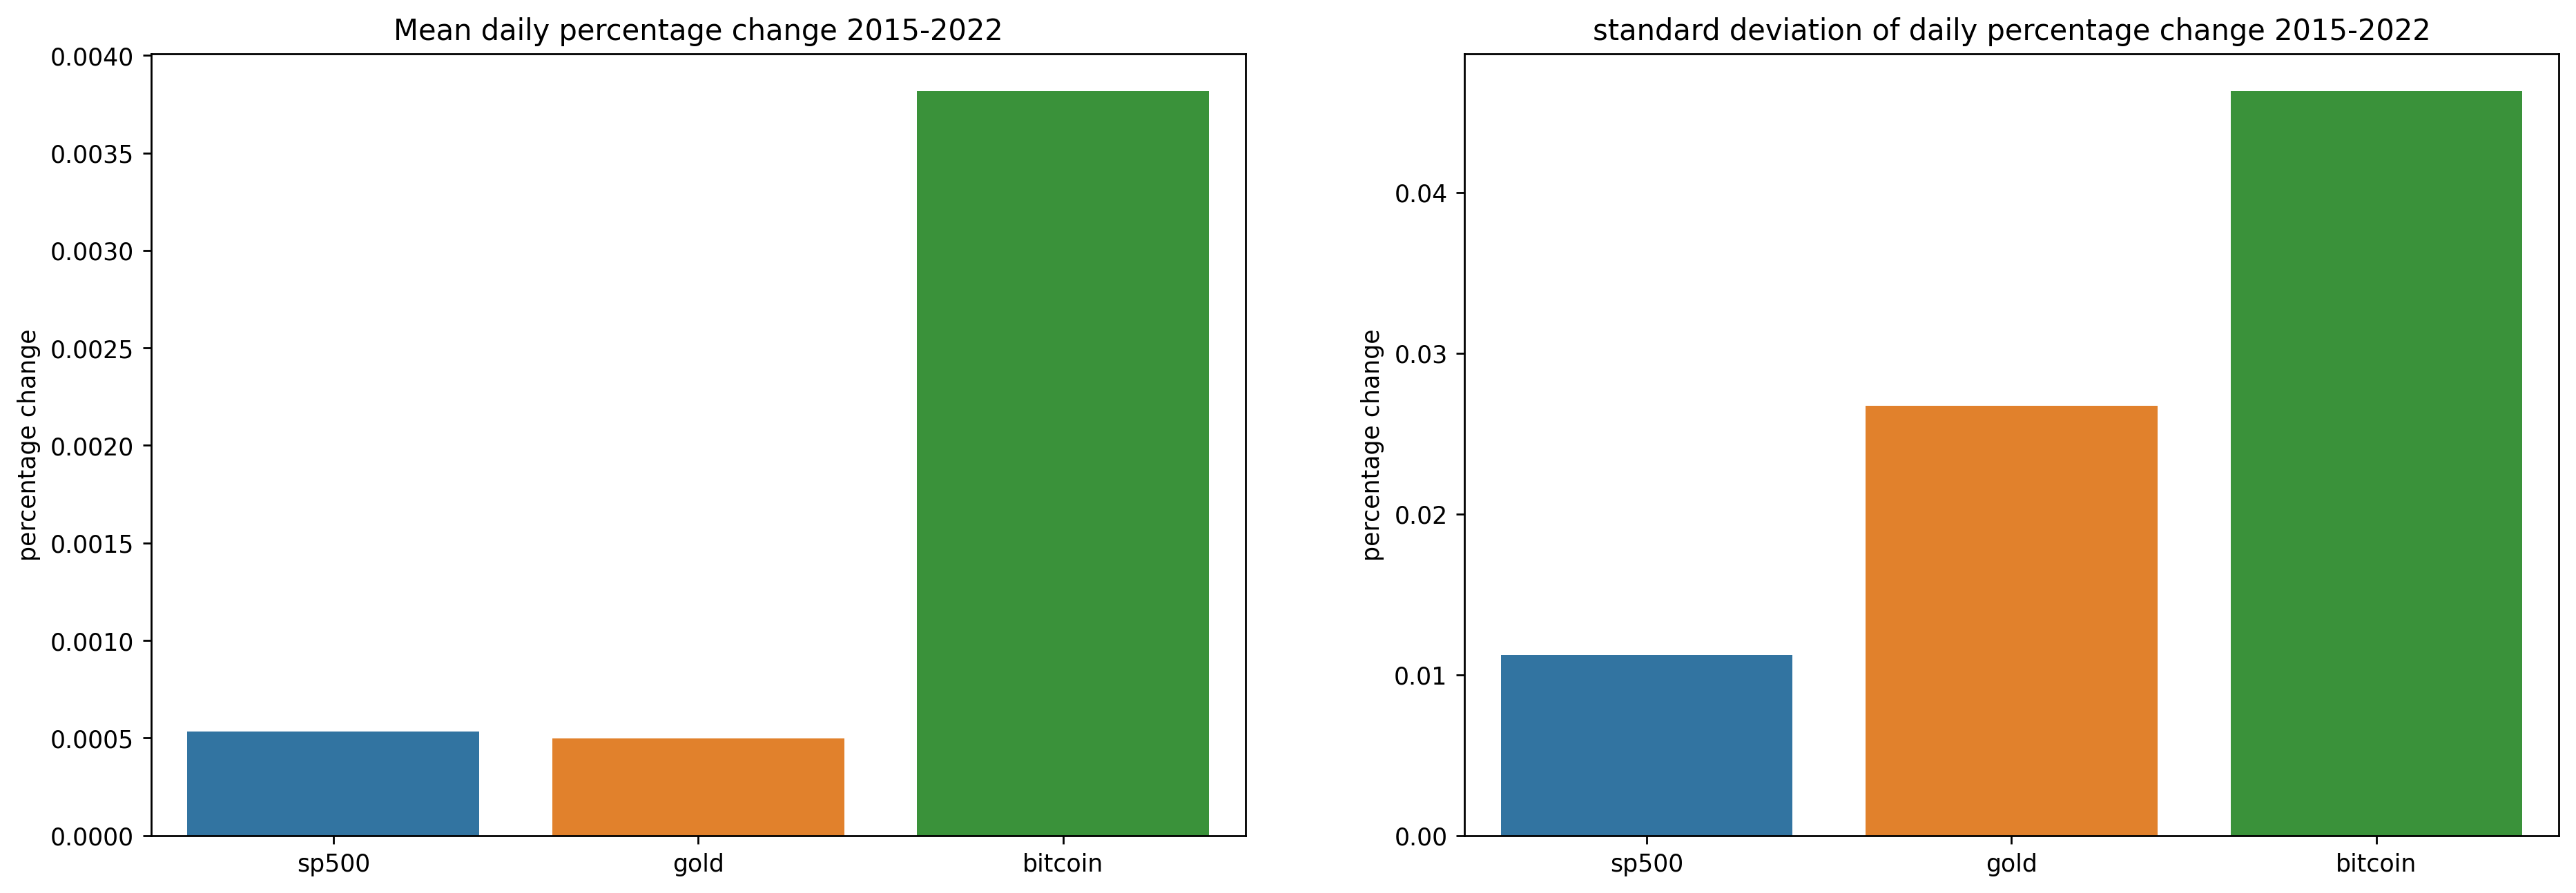

In [33]:
fig, axes = plt.subplots(1,2,figsize=(18,6),dpi = 250)
sns.barplot(x=m.index,y=m.values,ax = axes[0]).set(title='Mean daily percentage change 2015-2022',ylabel='percentage change')
sns.barplot(x=s.index,y=s.values,ax = axes[1]).set(title='standard deviation of daily percentage change 2015-2022',ylabel='percentage change');

* we could see that the returns on gold or sp500 have same mean, but gold has more voliability.
* the bitcoin has high return and high viliability.

In [34]:
# we will calculate the annual sharpe rate - we do it by multypling by annual_factor. there are 252 buisness days per year.
annual_factor = 252**0.5
sharps = m/s * annual_factor
sharps

sp500      0.755315
gold       0.294857
bitcoin    1.309007
dtype: float64

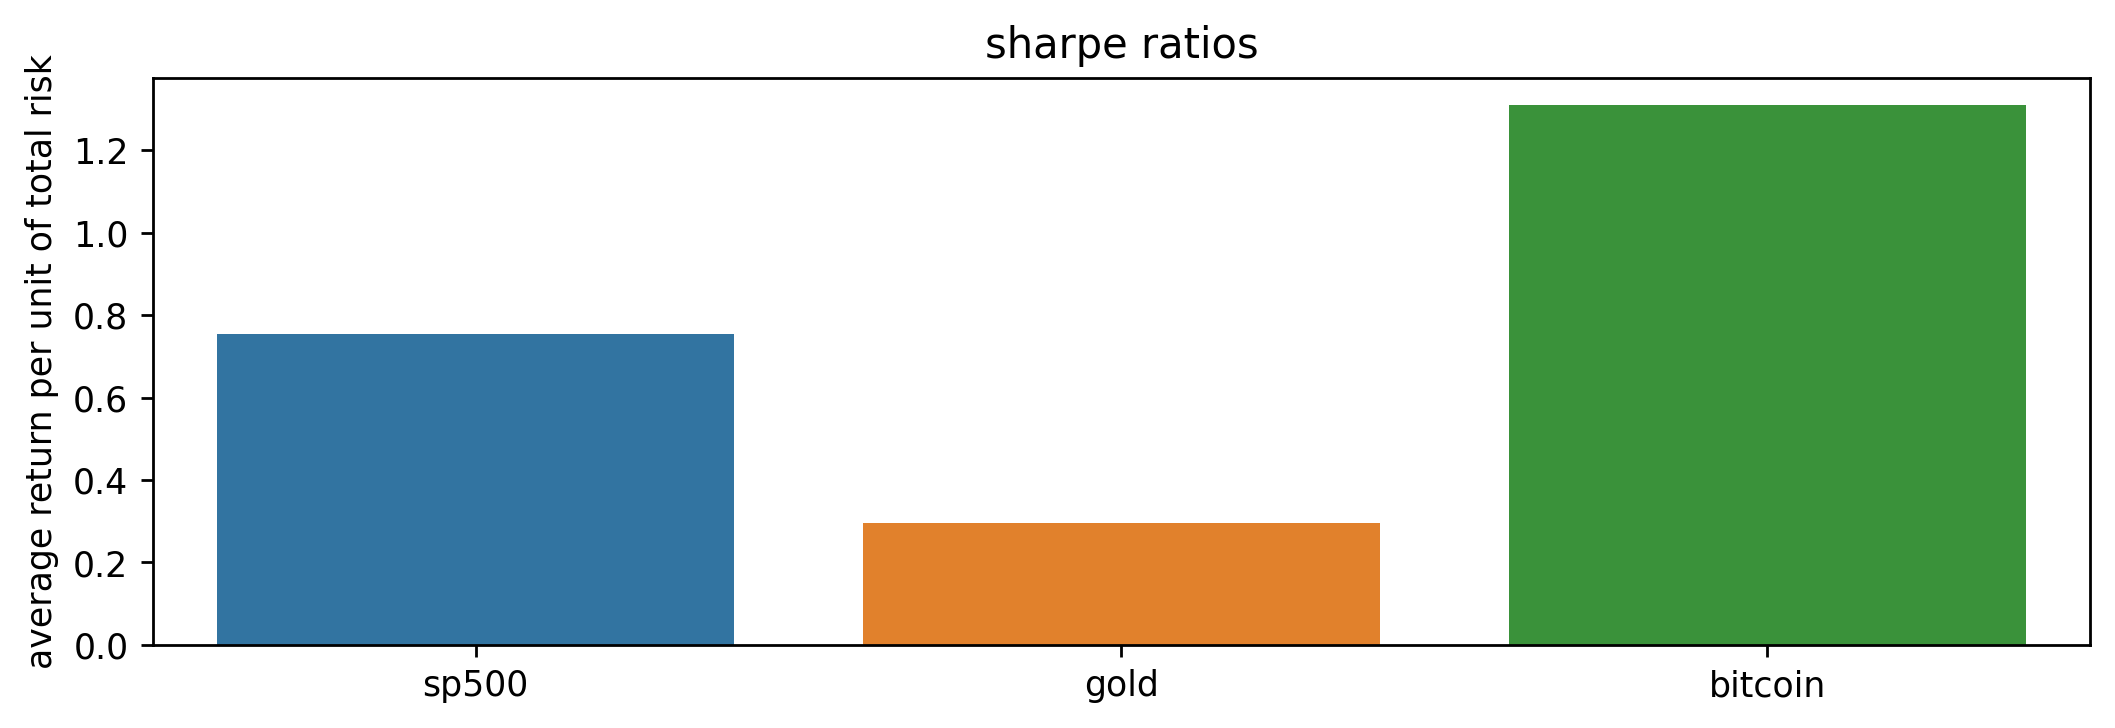

In [35]:
fig, axes = plt.subplots(1,1,figsize=(10,3),dpi = 250)
sns.barplot(x=sharps.index,y=sharps.values).set(title='sharpe ratios',ylabel='average return per unit of total risk');

* but i think that this is far from true , because the voliability of the bitcoin is in overall upwards, so i think the a better way will be to see the SORTINO RATE - it's like the sharp ratio, but takes in demand only the standard deviation of the downside.

In [36]:
gold_std = unite_pct[unite_pct['gold']<0]['gold'].std()
bitcoin_std = unite_pct[unite_pct['bitcoin']<0]['bitcoin'].std()
sp500_std = unite_pct[unite_pct['sp500']<0]['sp500'].std()

In [37]:
stds = [sp500_std, gold_std, bitcoin_std ]

In [38]:
sortino = m/stds * annual_factor
sortino

sp500      0.868762
gold       0.427712
bitcoin    1.749745
dtype: float64

In [39]:
sharpe_sortino = pd.DataFrame({'sharpe':sharps,'sortino':sortino})
sharpe_sortino = sharpe_sortino.unstack().reset_index()
sharpe_sortino.columns = ['metric','share','rate']
sharpe_sortino

,metric,share,rate
0,sharpe,sp500,0.755315
1,sharpe,gold,0.294857
2,sharpe,bitcoin,1.309007
3,sortino,sp500,0.868762
4,sortino,gold,0.427712
5,sortino,bitcoin,1.749745


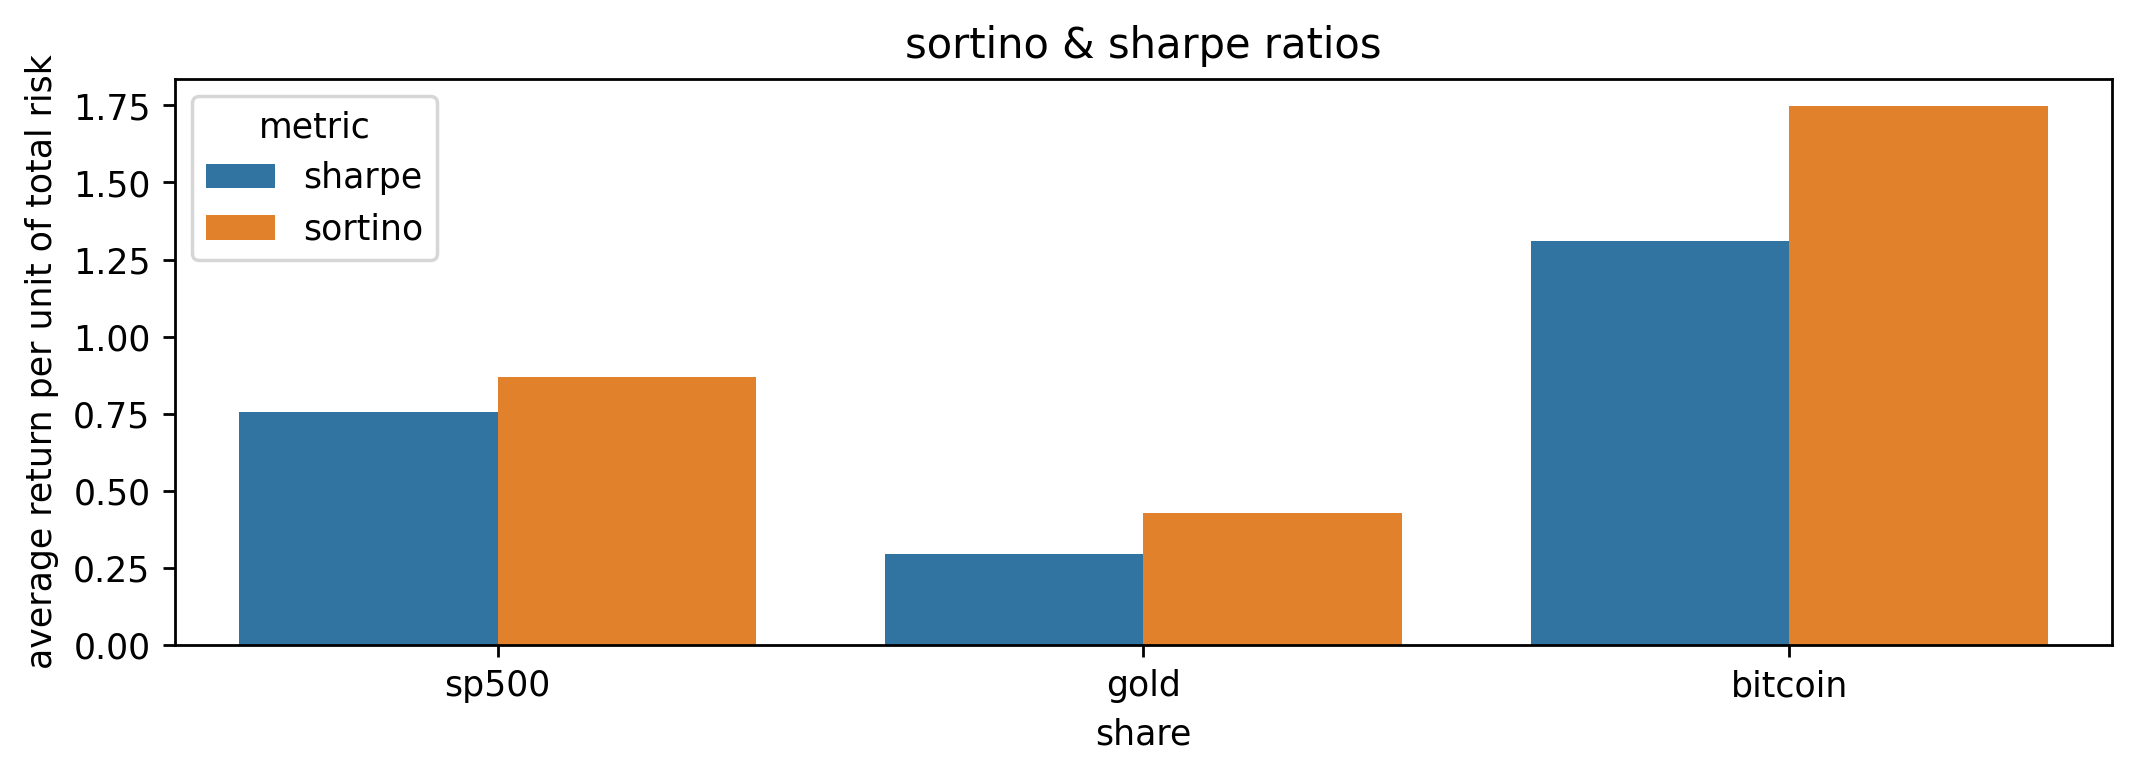

In [40]:
fig, axes = plt.subplots(1,1,figsize=(10,3),dpi = 250)
sns.barplot(data = sharpe_sortino,x = 'share', y ='rate', hue = 'metric').set(title='sortino & sharpe ratios',ylabel='average return per unit of total risk');

* all our rates are better in sortino rates, means there were more upsides then downsides. 
* so based on the data from the past, we could say that bitcoin is a good and safe invesment. 
* but, there are risks which the data don't tell us. for example:
    * wallet vulnerable to theft.
    * a spywares.
    * unexceptable envolving with the computational power to mine the coins.
    * etc.
* you could read <a href="https://en.bitcoin.it/wiki/Weaknesses">here</a> more
* based on our calculation i think that this is a great invesment, but because of these unpredictable risks it should be no more than 10% from all the portfolio.
    


### Do you believe Bitcoin could be used as a hedge versus inflation?

In [41]:
monthly_data = monthly_data.set_index('date')
monthly_data = monthly_data.join(bitcoin)
monthly_data.rename(columns={'close':'bitcoin'},inplace=True)
monthly_data.head()

,gold_usd,cpi_us,bitcoin
date,,,
2014-09-01,1241.330,237.852,NaN
2014-10-01,1223.565,238.031,383.614990
2014-11-01,1176.413,237.433,325.748993
2014-12-01,1200.440,236.151,379.244995
2015-01-01,1249.333,234.812,314.248993


* lets calculate monthly percentage changes.

In [42]:
monthly_data_pct = monthly_data.pct_change()

In [43]:
monthly_data_pct = monthly_data_pct.dropna()
monthly_data_pct.head()

,gold_usd,cpi_us,bitcoin
date,,,
2014-11-01,-0.038537,-0.002512,-0.150844
2014-12-01,0.020424,-0.005399,0.164225
2015-01-01,0.040729,-0.005670,-0.171383
2015-02-01,-0.014594,-0.004706,-0.277732
2015-03-01,-0.040991,0.004343,0.146406


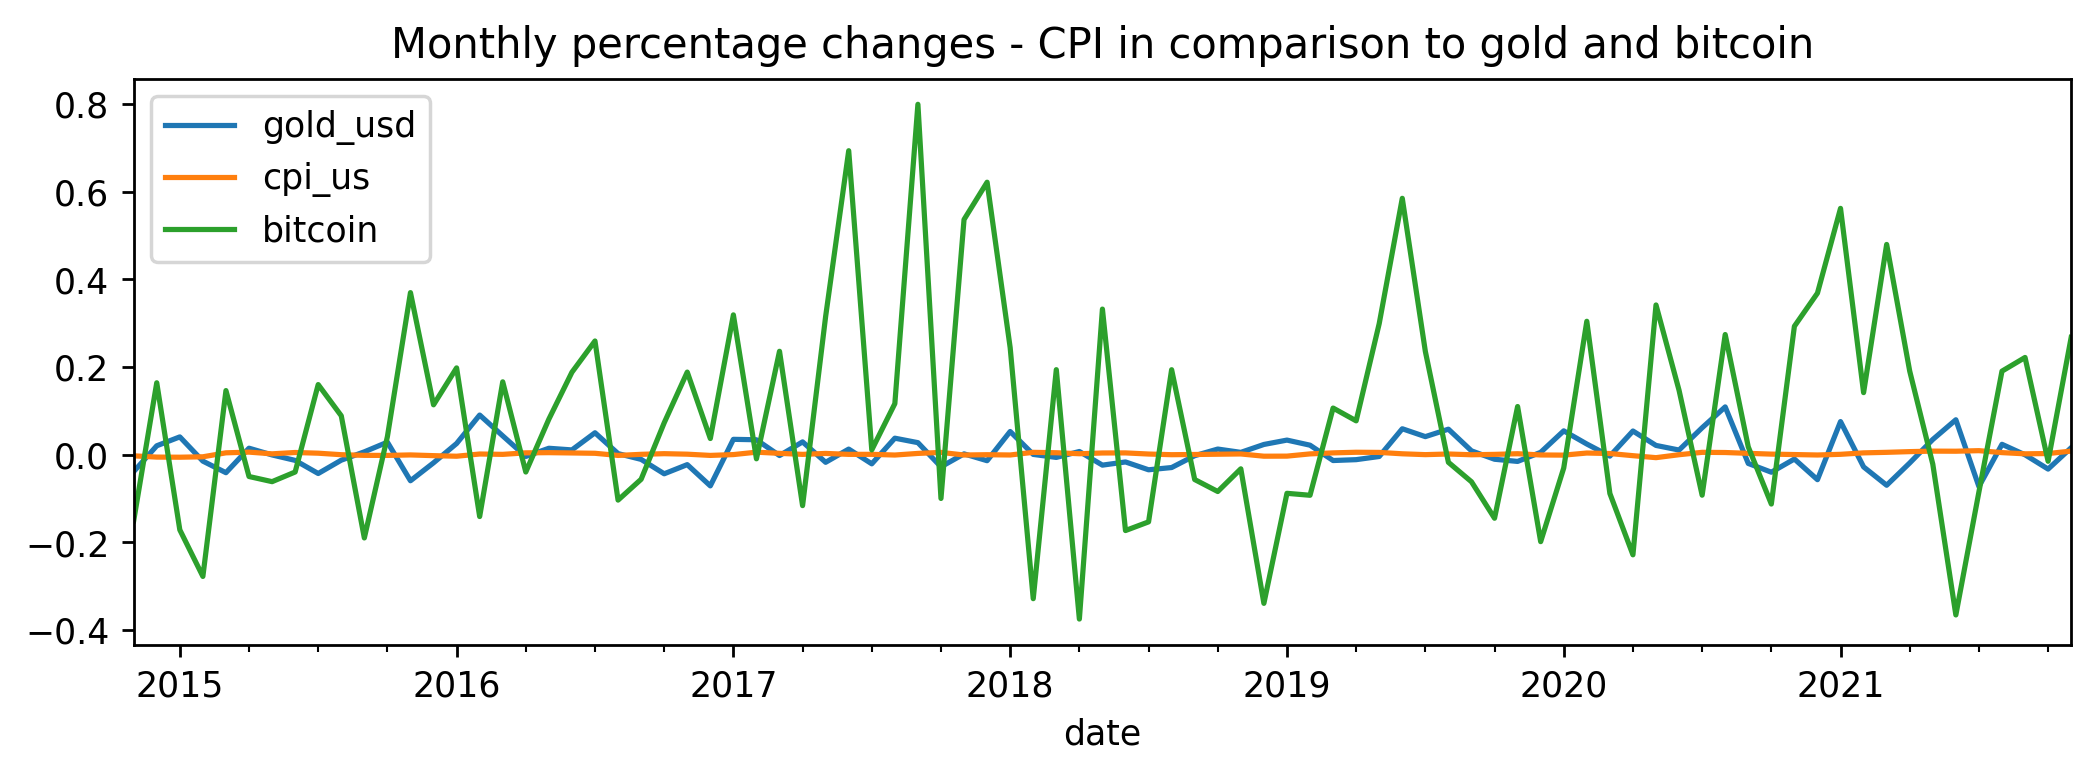

In [44]:
fig, axes = plt.subplots(1,1,figsize=(10,3),dpi = 250)
monthly_data_pct.plot(ax=axes);
plt.title("Monthly percentage changes - CPI in comparison to gold and bitcoin");

* we see here that the bitcoin isn't so stable compared to gold. so it wouldnt be recommended to use it as a hedge versus inflation.

### The CFO is looking to lower volatility in the fund. Explore building a portfolio using some or all of these assets. Make a recommendation that minimizes overall risk.

#### to build a portfolio we will use monte carlo simulation:
* we will see again our "unite_pct" dataframe which represents the percentage changes of our shares.
* we will add 1 to be the 100% plus the prcentage change.

In [45]:
log_returns = np.log(unite_pct+1)
log_returns

,sp500,gold,bitcoin
date,,,
2014-09-18,0.004879,-0.015504,-0.074643
2014-09-19,-0.000477,-0.022118,-0.072402
2014-09-22,-0.008046,-0.015454,0.018461
2014-09-23,-0.005793,0.008401,0.080333
2014-09-24,0.007802,-0.013606,-0.029306
...,...,...,...
2021-11-09,-0.003505,0.007161,-0.008845
2021-11-10,-0.008260,0.041922,-0.029958
2021-11-11,0.000551,0.009244,-0.000697


In [46]:
def generae_random_weights_with_sum_1(N):
    weights = np.random.random(N)
#     the dividing normalizes and make the sum 1:
    return weights/sum(weights)

generae_random_weights_with_sum_1(3)

array([0.18205878, 0.46212909, 0.35581214])

In [47]:
def calculate_returns(weights,log_returns):
#     we calculae the returns for different rates, multiplying by 252 to make it annual.
    return np.sum(log_returns.mean()*weights) * 252

* we will use the covarience to calculate the volalatility

In [48]:
cov = log_returns.cov()
cov

,sp500,gold,bitcoin
sp500,0.000127,0.000032,0.000083
gold,0.000032,0.000714,0.000134
bitcoin,0.000083,0.000134,0.002168


In [49]:
def calculate_volatility(weights,cov):
    annualized_cov = np.dot(cov*252, weights)
    vol = np.dot(weights.transpose(), annualized_cov)
    return vol **0.5
    
calculate_volatility(np.array([0.68302366, 0.08996704, 0.2270093 ]),cov)

0.23113732599985848

In [50]:
mc_portfolio_returns = []
mc_portfolio_volatility = []
mc_weights = []

for sim in range(4000):
    weights = generae_random_weights_with_sum_1(3)
    mc_weights.append(weights)
    returns = calculate_returns(weights,log_returns)
    mc_portfolio_returns.append(returns)
    vol = calculate_volatility(weights,cov)
    mc_portfolio_volatility.append(vol)
    

In [51]:
len(mc_portfolio_returns)

4000

In [52]:
sharpe_ratios = np.array(mc_portfolio_returns)/np.array(mc_portfolio_volatility)
sharpe_ratios

array([0.96716373, 0.74264211, 1.00642963, ..., 1.03309039, 0.58144367,
       1.04839922])

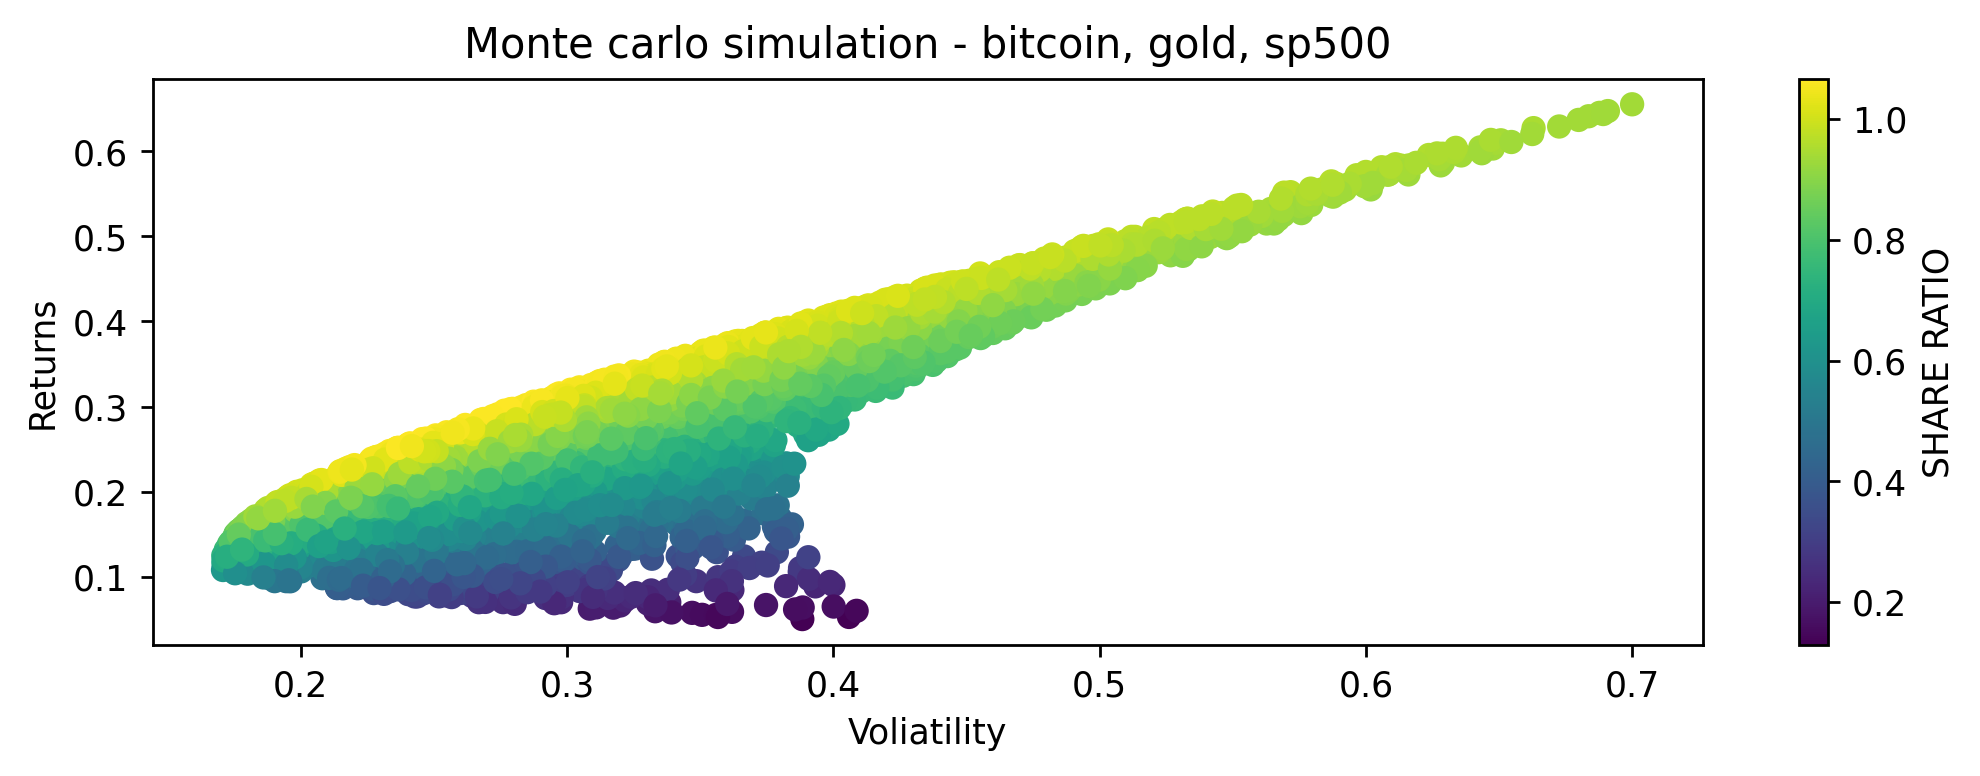

In [53]:
fig, axes = plt.subplots(1,1,figsize=(10,3),dpi = 250)
plt.scatter(x = mc_portfolio_volatility,y = mc_portfolio_returns, c=sharpe_ratios);
plt.colorbar(label="SHARE RATIO")
plt.title("Monte carlo simulation - bitcoin, gold, sp500")
plt.xlabel('Voliatility')
plt.ylabel('Returns');

* we could see the yellow line - there is the highest sharpe ratio. we should pick only rates from there.
* we could see a tradeoff between voliatility and returns - along the yellow line the return is higher but the voliatility too.


* in the project instructions it said that "The CFO is looking to lower volatility in the fund". I think that 0.2 - 0.3 volatility is good, so lets find the voliatility in this range with high sharpe ratio:
    

In [54]:
df = pd.DataFrame({'returns':mc_portfolio_returns,
            'volatility':mc_portfolio_volatility,
            'weights':mc_weights,
                  'sharpe':sharpe_ratios})
df.head()

,returns,volatility,weights,sharpe
0,0.202143,0.209006,"[0.657381271833743, 0.17132260711444883, 0.171...",0.967164
1,0.296108,0.398722,"[0.03807825678154029, 0.5678448096745716, 0.39...",0.742642
2,0.443505,0.440672,"[0.41686469204449644, 0.012118741982948326, 0....",1.006430
3,0.188836,0.200029,"[0.6786548843400361, 0.1731109959235988, 0.148...",0.944043
4,0.389340,0.423515,"[0.181157578987603, 0.3005149012112804, 0.5183...",0.919308


In [55]:
df_02_03 = df[(0.2<df['volatility']) & (df['volatility']<0.3)]
df_02_03.head()

,returns,volatility,weights,sharpe
0,0.202143,0.209006,"[0.657381271833743, 0.17132260711444883, 0.171...",0.967164
3,0.188836,0.200029,"[0.6786548843400361, 0.1731109959235988, 0.148...",0.944043
7,0.152250,0.277231,"[0.31651310994496806, 0.544913048424312, 0.138...",0.549183
8,0.098776,0.246226,"[0.4459584572642928, 0.513758448394915, 0.0402...",0.401158
10,0.258477,0.296803,"[0.3484815228069804, 0.3546317318009484, 0.296...",0.870871


In [56]:
x = df_02_03['returns'].argmax()
df_02_03.iloc[x]

returns                                                0.315453
volatility                                              0.29711
weights       [0.6502494923567915, 0.004317054649270305, 0.3...
sharpe                                                 1.061737
Name: 1632, dtype: object

In [57]:
log_returns.columns

Index(['sp500', 'gold', 'bitcoin'], dtype='object')

* so we could have a portfolio with volatility between 0.2 to 0.3, sharpe ratio of near to 0.8 with this shares:
    * sp500 - 65%
    * gold - 0%
    * bitcoin - 35%
   

# Conclusions

* based on the data from the past, we could say that bitcoin is a very profitable investment, with sharpe ratio of 1.3 and sortino ratio of 1.7
* so we highly recommend on this investment.
* but we should remember that there are other risks with bitcoin which are not related to the data. for example - spyware, theft of wallets and passwords etc.
* so we recommend to put it in the portfolio but to be aware to the different risks of this new asset.
* bitcoin has high volatility, so it isnt recommended to be a hedge versus inflation.
* we were asked to build a portfolio with these assets with low volatility. we build such portfolio between 20% - 30% volatility. thats the portfolio:
    * sp500 - 65%
    * gold - 0%
    * bitcoin - 35%
* the sharpe rate is around 1.
* we could build a portfolio with higher returns and sharpe rates, but with higher volatility too.